<a href="https://colab.research.google.com/github/UmeshChandra05/AI-ML-Lab/blob/main/AI_ML_ProjectB2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project Objective**

**Dataset:** Kaggle's Amazon Employee Access Challenge dataset

The aim of this project is to develop a model using historical data that can effectively determine an employee's access requirements, thereby minimizing manual access transactions such as grants and revokes as the employee's attributes evolve over time. The model will take into account an employee's role information and a resource code to predict whether access should be granted or not.

The dataset comprises real historical data collected between 2010 and 2011. Access to resources has been manually approved or denied for employees over time. The task is to create an algorithm capable of learning from this historical data to predict approval or denial for a new set of employees.

**File Descriptions:**
- *train.csv:* This file contains the training set. Each row includes the ACTION (ground truth), RESOURCE, and details about the employee's role at the time of approval.
- *test.csv:* This file comprises the test set for which predictions are required. Each row in this file asks whether an employee with the listed characteristics should have access to the listed resource.

### **Project Index**

1. Data collection - Import and Read Data

2. Data Pre-processing
  
   a. Data Transformation
   
   b. Data Splitting

3. Models

   a. Model 1 - Logistic Regression Model

   b. Model 2 - Support Vector Machines (SVM)

   c. Model 3 - Decision Tree Model

   d. Model 4 - K-Nearest Neighbors (K-NN) Model

4. Model comparision and Conclusion

## **1. Data collection- Import and Read Data**

In [48]:
#Importing all necessory librariies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import tensorflow as tf
from tensorflow import keras
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from tensorflow.python.data import Dataset
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import svm


In [44]:
# Reading training dataset

train_dataframe = pd.read_csv("/content/train.csv", sep=",")
train_dataframe = train_dataframe.reindex(np.random.permutation(train_dataframe.index))

train_dataframe.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
2941,1,27159,2991,117961,118343,118700,118784,117906,290919,118786
22909,1,75683,5666,122880,122974,117945,118274,149467,292795,118276
13140,1,34518,1915,117961,118300,119181,118321,117906,290919,118322
29960,1,42093,3622,117961,118300,118458,118834,223125,118424,118836
949,1,43273,51058,117902,118041,134257,118028,118368,117887,118030


In [45]:
# Reading test dataset

test_dataframe = pd.read_csv("/content/test.csv", sep=",")
test_dataframe = test_dataframe.reindex(np.random.permutation(test_dataframe.index))

test_dataframe.head()

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
28824,28825,76465,53150,117902,117903,128935,118863,142453,118398,118865
57245,57246,4675,5490,117961,117962,5488,118641,118642,118643,118644
51608,51609,18072,58702,118256,118257,117945,280788,280788,292795,119082
15919,15920,32642,2522,118169,118170,118623,117946,131824,292795,117948
50230,50231,59756,806,117961,118300,123719,117905,117906,290919,117908


In [46]:
#Checking dataframe shapes for both datasets

print("Training dataframe shape: ",train_dataframe.shape)
print("Test dataframe shape: ",test_dataframe.shape)

Training dataframe shape:  (32769, 10)
Test dataframe shape:  (58921, 10)


ACTION
1    30872
0     1897
Name: count, dtype: int64


<ipython-input-47-fd810891928b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ACTION',data = train_dataframe, palette='hls')


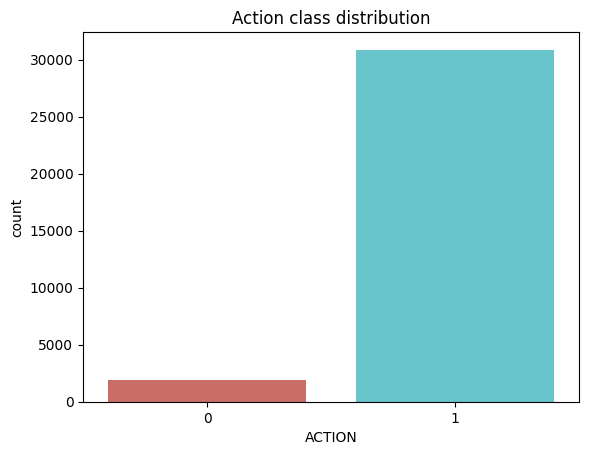

<Figure size 640x480 with 0 Axes>

In [47]:
# checking count of each categories for the target variable in the training dataframe

print(train_dataframe['ACTION'].value_counts())
sns.countplot(x='ACTION',data = train_dataframe, palette='hls')
plt.title("Action class distribution")
plt.show()
plt.savefig('count_plot_training')

## **2. Data Preprocessing**

In [6]:
#1. Handling Missing Data
# Checking if there is any missing value in the dataset

train_dataframe.isnull().sum()

#2. Handling Outliers
# As the dataset contains categoral and binary data, there is no need to check outliers as categiorical data means
# It's just the composition of the sample which you have selected.

ACTION              0
RESOURCE            0
MGR_ID              0
ROLE_ROLLUP_1       0
ROLE_ROLLUP_2       0
ROLE_DEPTNAME       0
ROLE_TITLE          0
ROLE_FAMILY_DESC    0
ROLE_FAMILY         0
ROLE_CODE           0
dtype: int64

In [7]:
#3. Feature selection
#As there are no missing values and outliers, let's proceed with finding unique categories for each column
train_dataframe.apply(lambda x: len(x.unique()))

ACTION                 2
RESOURCE            7518
MGR_ID              4243
ROLE_ROLLUP_1        128
ROLE_ROLLUP_2        177
ROLE_DEPTNAME        449
ROLE_TITLE           343
ROLE_FAMILY_DESC    2358
ROLE_FAMILY           67
ROLE_CODE            343
dtype: int64

<ipython-input-8-dcd6eb14a7c1>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  RESOURCE= sns.distplot(train_dataframe['RESOURCE'].values, ax = axes[0,0])
<ipython-input-8-dcd6eb14a7c1>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  MGR_ID= sns.distplot(train_dataframe['MGR_ID'].values, ax = axes[0,1])
<ipython-input-

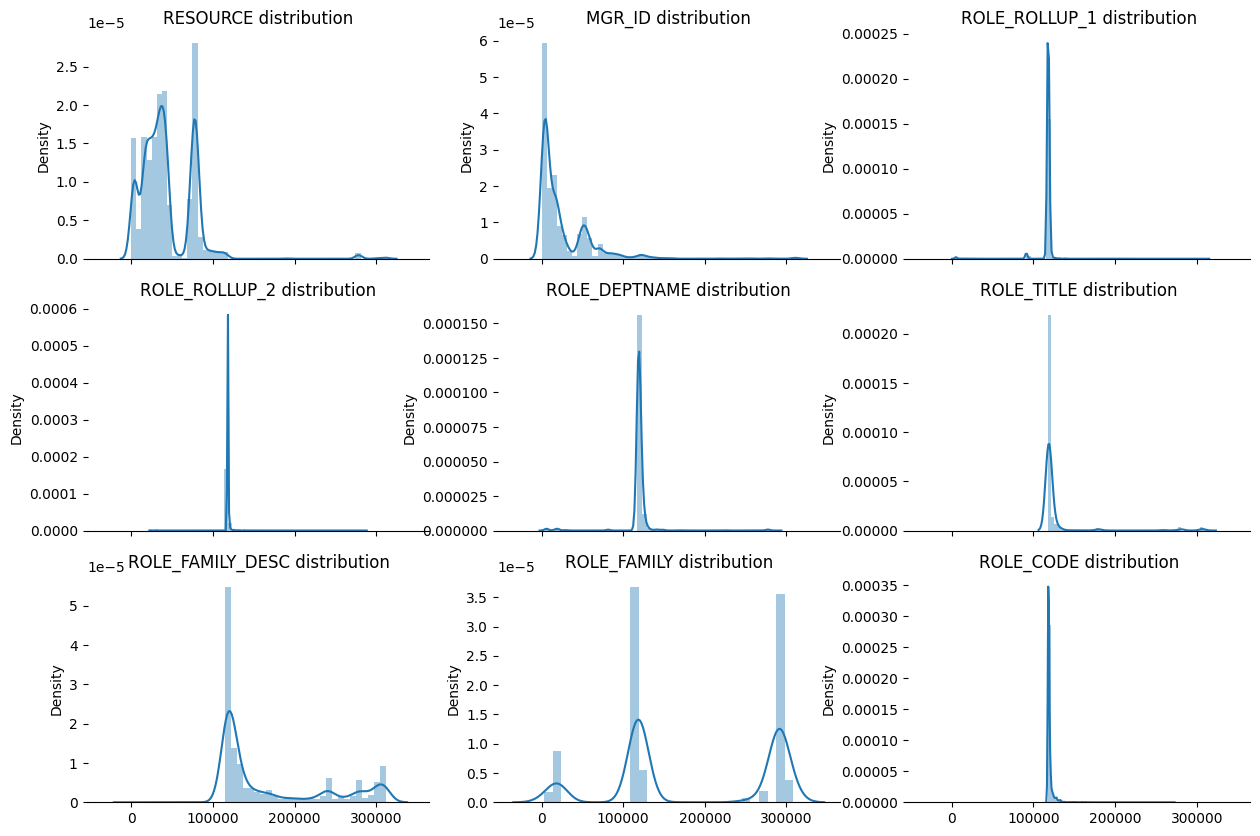

In [8]:
# Checking distributions of all variables
f, axes = plt.subplots(3, 3, figsize=(15, 10), sharex=True)
sns.despine(left=True)

# distribution of RESOURCE
RESOURCE= sns.distplot(train_dataframe['RESOURCE'].values, ax = axes[0,0])
RESOURCE.title.set_text("RESOURCE distribution")

# distribution of MGR_ID
MGR_ID= sns.distplot(train_dataframe['MGR_ID'].values, ax = axes[0,1])
MGR_ID.title.set_text("MGR_ID distribution")

# distribution of ROLE_ROLLUP_1
ROLE_ROLLUP_1= sns.distplot(train_dataframe['ROLE_ROLLUP_1'].values, ax = axes[0,2])
ROLE_ROLLUP_1.title.set_text("ROLE_ROLLUP_1 distribution")

# distribution of ROLE_ROLLUP_2
ROLE_ROLLUP_2= sns.distplot(train_dataframe['ROLE_ROLLUP_2'].values, ax = axes[1,0])
ROLE_ROLLUP_2.title.set_text("ROLE_ROLLUP_2 distribution")

# distribution of ROLE_DEPTNAME
ROLE_DEPTNAME= sns.distplot(train_dataframe['ROLE_DEPTNAME'].values, ax = axes[1,1])
ROLE_DEPTNAME.title.set_text("ROLE_DEPTNAME distribution")

# distribution of ROLE_TITLE
ROLE_TITLE= sns.distplot(train_dataframe['ROLE_TITLE'].values, ax = axes[1,2])
ROLE_TITLE.title.set_text("ROLE_TITLE distribution")

# distribution of ROLE_FAMILY_DESC
ROLE_FAMILY_DESC= sns.distplot(train_dataframe['ROLE_FAMILY_DESC'].values, ax = axes[2,0])
ROLE_FAMILY_DESC.title.set_text("ROLE_FAMILY_DESC distribution")

# distribution of ROLE_FAMILY
ROLE_FAMILY= sns.distplot(train_dataframe['ROLE_FAMILY'].values, ax = axes[2,1])
ROLE_FAMILY.title.set_text("ROLE_FAMILY distribution")

# distribution of ROLE_CODE
ROLE_CODE= sns.distplot(train_dataframe['ROLE_CODE'].values, ax = axes[2,2])
ROLE_CODE.title.set_text("ROLE_CODE distribution")

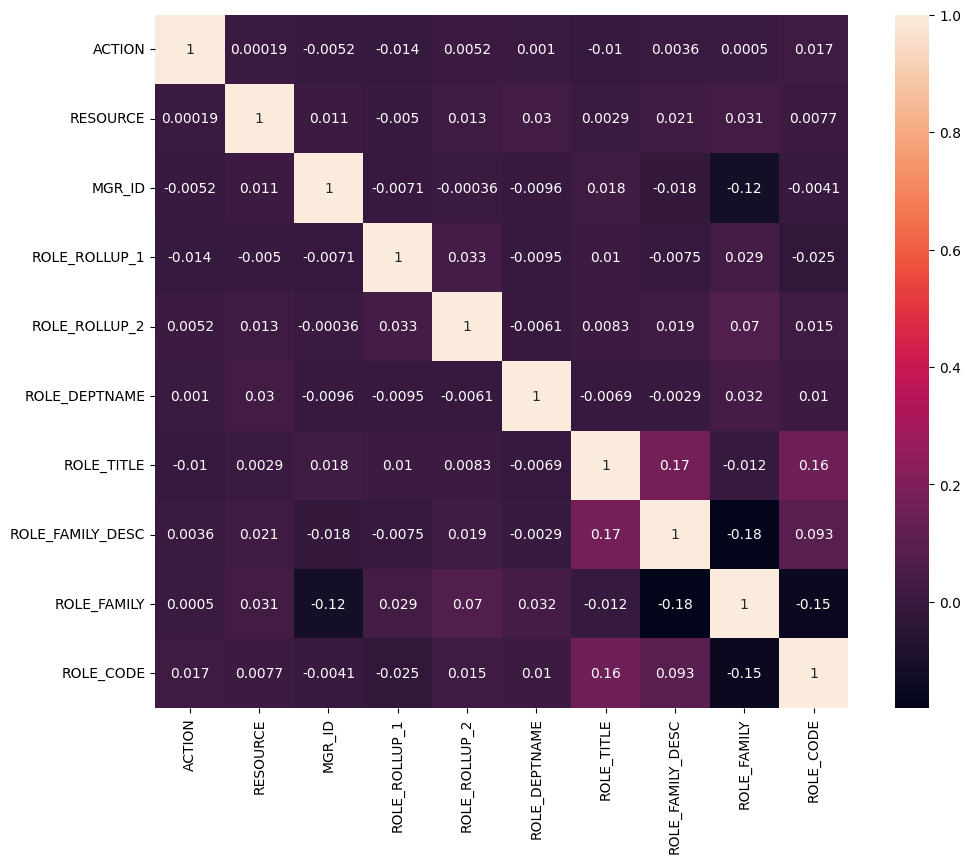

In [9]:
# heat map of correlation of features
# They all have weak correlation with the target variable

correlation_matrix = train_dataframe.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=1,square = True, annot=True)
plt.show()

In [10]:
# checking correlation between ROLE_TITLE, ROLE_CODE
# They have weak correlation as well so we will not be dropping any variables.

print(train_dataframe[["ROLE_TITLE","ROLE_CODE"]].corr())

            ROLE_TITLE  ROLE_CODE
ROLE_TITLE     1.00000    0.15592
ROLE_CODE      0.15592    1.00000


### **2.a. Data Transformation**

In [11]:
#As seen in the last result, there are some categorical variables hence using One hot encoder to transform data for analysis

one_hot_encoder = OneHotEncoder(sparse=True, dtype=np.float32, handle_unknown='ignore')

# Using One hot encoding on training dataset
X_train_columns = [x for x in train_dataframe.columns if x!="ACTION"]
X = one_hot_encoder.fit_transform(train_dataframe[X_train_columns])

# Using One hot encoding on test dataset
X_test_columns = [x for x in test_dataframe.columns if x!="id"]
X_test = one_hot_encoder.transform(test_dataframe[X_test_columns])

#Splitting target variable in y for training dataset
y = train_dataframe["ACTION"].values

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [12]:
# Checking the data after one hot encoding
print("Training data: ",X[4])
print("\n Training Target: ",y)

print("\n Test data: ",X_test[1])

Training data:    (0, 2257)	1.0
  (0, 10793)	1.0
  (0, 11782)	1.0
  (0, 11955)	1.0
  (0, 12343)	1.0
  (0, 12519)	1.0
  (0, 12865)	1.0
  (0, 15280)	1.0
  (0, 15287)	1.0

 Training Target:  [1 1 1 ... 1 1 1]

 Test data:    (0, 6598)	1.0
  (0, 7545)	1.0
  (0, 11782)	1.0
  (0, 11961)	1.0
  (0, 12321)	1.0
  (0, 12537)	1.0
  (0, 12912)	1.0
  (0, 15280)	1.0
  (0, 15306)	1.0


### **2.b.Data Splitting**

In [13]:
#Spittting Training dataset into training and validation datasets (validation dataset= 20%, Training dataset = 80%)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

In [14]:
#Checking dataframe shapes after splitting and one hot encoding (which are now sparse matrix, which will be easy for analysis)

print("Training dataframe shape: ", X_train.shape)
print("Validation dataframe shape: ",X_val.shape)
print("Test dataframe shape: ",X_test.shape)

Training dataframe shape:  (26215, 15626)
Validation dataframe shape:  (6554, 15626)
Test dataframe shape:  (58921, 15626)


### **3. Models**


**a. Model 1 - Logistic Regression Model**

In [15]:
# Building Logistic regression model

model_logisticRegression = LogisticRegression( random_state=623,
                                               solver = 'saga',
                                               max_iter = 10000,
                                               warm_start = False,
                                               verbose = 1,
                                               tol = 1e-5)

In [16]:
# Cross validating the Logistic regression model to check the score and summary of the model
statistics_cv = cross_validate(model_logisticRegression, X_train, y_train, groups=None, scoring='roc_auc', cv=5, n_jobs=2, return_train_score = True)

# Describing the summary of the Logistic regression model
statistics_cv = pd.DataFrame(statistics_cv)
statistics_cv.describe()

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


,fit_time,score_time,test_score,train_score
count,5.000000,5.000000,5.000000,5.000000
mean,12.788252,0.007584,0.847248,0.977334
std,2.495115,0.003990,0.000682,0.000891
min,8.388793,0.003741,0.846192,0.976490
25%,13.248300,0.004967,0.847159,0.976501
50%,13.895630,0.005404,0.847280,0.977444
75%,13.981773,0.011863,0.847564,0.977601
max,14.426766,0.011944,0.848046,0.978632


In [17]:
# Model Fitting

model_logisticRegression_history = model_logisticRegression.fit(X_train, y_train)

convergence after 983 epochs took 10 seconds


In [18]:
# Model evaluation

Accuracy_Logistic_Regression = model_logisticRegression_history.score(X_val, y_val)
print("Accuracy of Logistic Regression Model- Validation Dataset: %.3f%%" % (Accuracy_Logistic_Regression*100.0))

Accuracy of Logistic Regression Model- Validation Dataset: 94.629%


In [19]:
# Model evaluation

Accuracy_Logistic_Regression = model_logisticRegression_history.score(X_train, y_train)
print("Accuracy of Logistic Regression Model- Training Dataset: %.3f%%" % (Accuracy_Logistic_Regression*100.0))

Accuracy of Logistic Regression Model- Training Dataset: 95.949%


In [20]:
# Confusion matrix for Validation dataset

y_val_predictions = model_logisticRegression_history.predict(X_val)
cm = metrics.confusion_matrix(y_val, y_val_predictions)
print(cm)

[[  60  323]
 [  29 6142]]


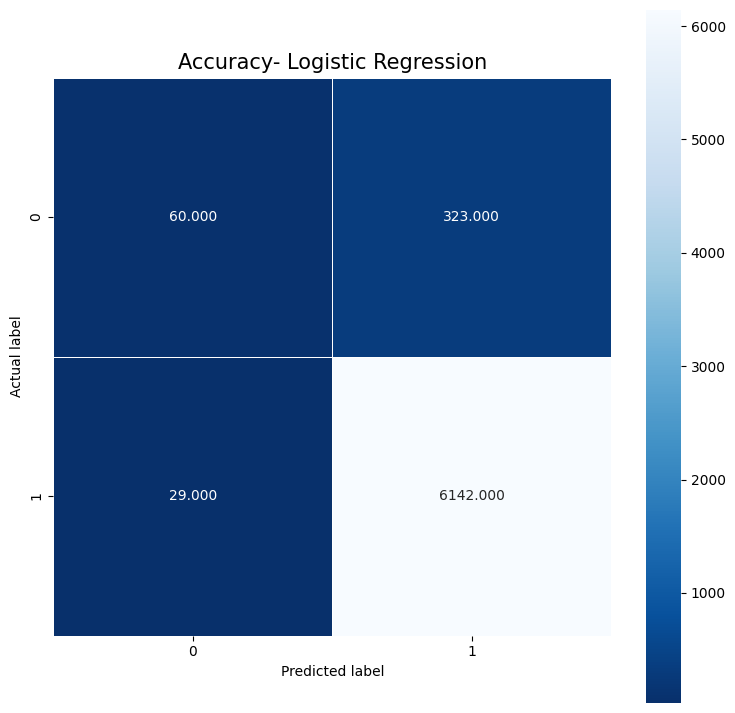

In [21]:
# Heat map for the confusion matrix

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title("Accuracy- Logistic Regression", size = 15);

In [22]:
# Misclassification rate

print("Misclassifcation rate of Logistic regression model: ",
      (((cm[0][1] + cm[1][0])/cm.sum())*100), "%")

Misclassifcation rate of Logistic regression model:  5.3707659444613975 %


In [23]:
# Checking Logistic regression model summary of validation dataset

print(classification_report(y_val, y_val_predictions))

              precision    recall  f1-score   support

           0       0.67      0.16      0.25       383
           1       0.95      1.00      0.97      6171

    accuracy                           0.95      6554
   macro avg       0.81      0.58      0.61      6554
weighted avg       0.93      0.95      0.93      6554



In [24]:
# Model prediction of Test dataset

y_test = model_logisticRegression_history.predict(X_test)

In [25]:
# saving predictions in dataframe

y_test_predictions = pd.DataFrame()
y_test_predictions["id"] = test_dataframe["id"]
y_test_predictions["ACTION"] = y_test
print(y_test_predictions)

# Saving results to csv file

y_test_predictions.to_csv("submission.csv", index = False)

          id  ACTION
48364  48365       1
23245  23246       1
26238  26239       1
44595  44596       1
54664  54665       1
...      ...     ...
26762  26763       1
44309  44310       1
34129  34130       1
21449  21450       1
38584  38585       1

[58921 rows x 2 columns]


ACTION
1    58074
0      847
Name: count, dtype: int64


<ipython-input-26-8085718c94a4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ACTION',data = y_test_predictions, palette='hls')


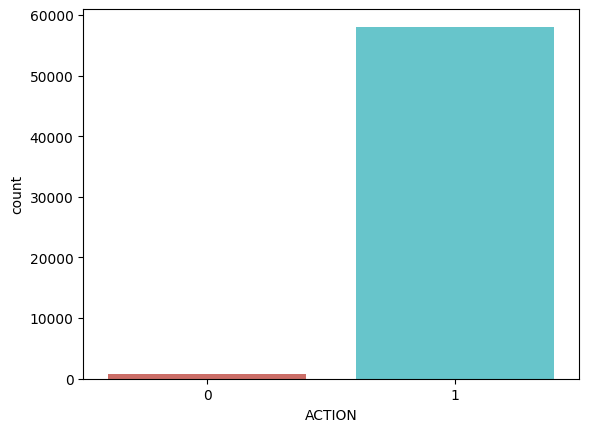

<Figure size 640x480 with 0 Axes>

In [26]:
# Finding ACTION target variable for test dataframe

print(y_test_predictions['ACTION'].value_counts())
sns.countplot(x='ACTION',data = y_test_predictions, palette='hls')
plt.show()
plt.savefig('count_plot')

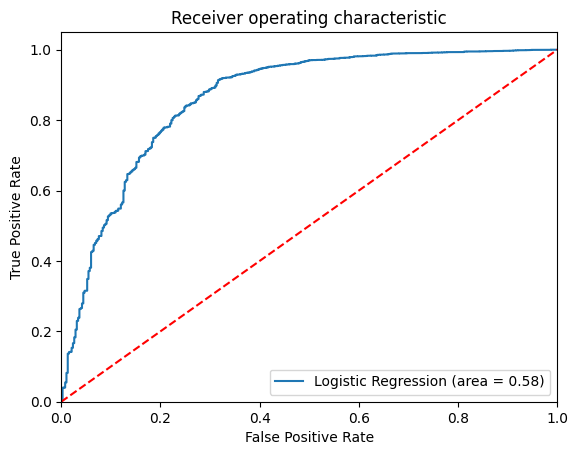

In [27]:
# ROC curve for Logistic regression model
# The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers.
# The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

logit_roc_auc = roc_auc_score(y_val, model_logisticRegression_history.predict(X_val))
fpr, tpr, thresholds = roc_curve(y_val, model_logisticRegression_history.predict_proba(X_val)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

**b. Model 3 - Support Vector Machines (SVM)**

In [28]:
# Building Support Vector Machines (SVM) model

model_svm = svm.SVC()

In [29]:
# Cross validating the Support Vector Machines (SVM) model to check the score and summary of the model

statistics_cv = cross_validate(model_svm, X_train, y_train, groups=None, scoring='roc_auc', cv=5, n_jobs=2, return_train_score = True)

statistics_cv = pd.DataFrame(statistics_cv)
statistics_cv.describe()

,fit_time,score_time,test_score,train_score
count,5.000000,5.000000,5.000000,5.000000
mean,49.737038,4.108499,0.846624,0.995791
std,9.293011,0.802495,0.007570,0.000469
min,33.200622,2.680331,0.838494,0.994985
25%,52.900037,4.328491,0.838651,0.995763
50%,53.135667,4.481865,0.849893,0.996056
75%,54.139751,4.519850,0.851234,0.996063
max,55.309114,4.531959,0.854848,0.996086


In [30]:
# Model Fitting

model_svm_history = model_svm.fit(X_train, y_train)

In [31]:
#Confusion matrix for Validation dataset

y_val_predictions = model_svm_history.predict(X_val)
cm_svm = metrics.confusion_matrix(y_val, y_val_predictions)
print(cm_svm)

[[  66  317]
 [  27 6144]]


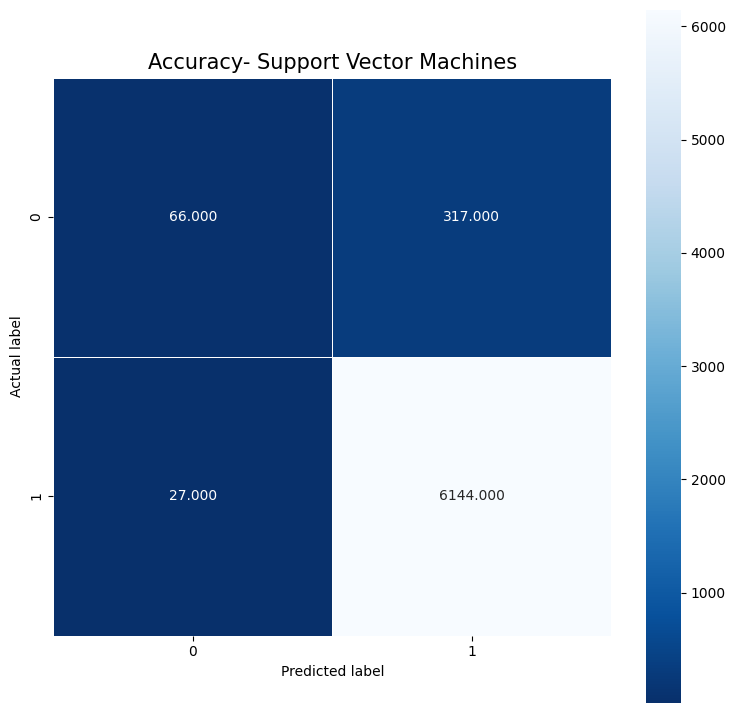

In [32]:
# Heat map for the confusion matrix

plt.figure(figsize=(9,9))
sns.heatmap(cm_svm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title("Accuracy- Support Vector Machines", size = 15);

In [33]:
# Misclassification rate

print("Misclassifcation rate of SVM Model: ",
      (((cm_svm[0][1] + cm_svm[1][0])/cm_svm.sum())*100), "%")

Misclassifcation rate of SVM Model:  5.248703082087275 %


In [34]:
# Checking accuracy on validation dataset using model

print(classification_report(y_val, y_val_predictions))

              precision    recall  f1-score   support

           0       0.71      0.17      0.28       383
           1       0.95      1.00      0.97      6171

    accuracy                           0.95      6554
   macro avg       0.83      0.58      0.63      6554
weighted avg       0.94      0.95      0.93      6554



In [35]:
# Model accuracy

Accuracy_svm = model_svm_history.score(X_train, y_train)
print("Accuracy of SVM Model- Training dataset: %.3f%%" % (Accuracy_svm*100.0))

Accuracy of SVM Model- Training dataset: 95.739%


In [36]:
# Model evaluation

Accuracy_svm = model_svm_history.score(X_val, y_val)
print("Accuracy of SVM Model- - Validation Dataset: %.3f%%" % (Accuracy_svm*100.0))

Accuracy of SVM Model- - Validation Dataset: 94.751%


In [37]:
#Predicting test dataset

y_test = model_svm_history.predict(X_test)

In [38]:
#saving predictions in dataframe
y_test_predictions = pd.DataFrame()
y_test_predictions["id"] = test_dataframe["id"]
y_test_predictions["ACTION"] = y_test
print(y_test_predictions)

#Saving results to csv file
y_test_predictions.to_csv("submission.csv", index = False)

          id  ACTION
48364  48365       1
23245  23246       1
26238  26239       1
44595  44596       1
54664  54665       1
...      ...     ...
26762  26763       1
44309  44310       1
34129  34130       1
21449  21450       1
38584  38585       1

[58921 rows x 2 columns]


In [39]:
# Finding ACTION target variable for test dataframe

count_Class= y_test_predictions['ACTION'].value_counts()

print("Count of ACTION variable: \n",count_Class)

Count of ACTION variable: 
 ACTION
1    58103
0      818
Name: count, dtype: int64


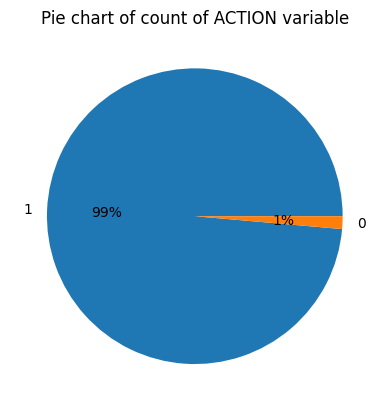

In [40]:
# Pie chart for counts of ACTION target variable for test dataframe

count_Class.plot(kind = 'pie',  autopct='%1.0f%%')
plt.title('Pie chart of count of ACTION variable')
plt.ylabel('')
plt.show()

**c. Decision Tree Model**

In [ ]:
# Building Decision Tree model
model_dt = DecisionTreeClassifier()

In [ ]:
# Cross validating the Decision Tree model
statistics_cv_dt = cross_validate(model_dt, X_train, y_train, groups=None, scoring='roc_auc', cv=5, n_jobs=2, return_train_score = True)
statistics_cv_dt = pd.DataFrame(statistics_cv_dt)
statistics_cv_dt.describe()

In [ ]:
# Training the Decision Tree model
model_dt_history = model_dt.fit(X_train, y_train)

In [ ]:
# Confusion matrix for Validation dataset
y_val_predictions_dt = model_dt_history.predict(X_val)
cm_dt = metrics.confusion_matrix(y_val, y_val_predictions_dt)
print(cm_dt)

In [ ]:
# Heat map for the confusion matrix
plt.figure(figsize=(9,9))
sns.heatmap(cm_dt, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("Accuracy- Decision Tree", size = 15)

In [ ]:
# Misclassification rate
print("Misclassification rate of Decision Tree Model: ", (((cm_dt[0][1] + cm_dt[1][0])/cm_dt.sum())*100), "%")

In [ ]:
# Checking accuracy on validation dataset using model
print(classification_report(y_val, y_val_predictions_dt))

In [ ]:
# Model accuracy on training dataset
Accuracy_dt_train = model_dt_history.score(X_train, y_train)
print("Accuracy of Decision Tree Model- Training dataset: %.3f%%" % (Accuracy_dt_train*100.0))

In [ ]:
# Model accuracy on validation dataset
Accuracy_dt_val = model_dt_history.score(X_val, y_val)
print("Accuracy of Decision Tree Model- Validation Dataset: %.3f%%" % (Accuracy_dt_val*100.0))

In [ ]:
# Predicting on test dataset
y_test_dt = model_dt_history.predict(X_test)

In [ ]:
# Saving predictions in dataframe
y_test_predictions_dt = pd.DataFrame()
y_test_predictions_dt["id"] = test_dataframe["id"]
y_test_predictions_dt["ACTION"] = y_test_dt
print(y_test_predictions_dt)

# Saving results to csv file
y_test_predictions_dt.to_csv("submission_dt.csv", index=False)

In [ ]:
# Finding ACTION target variable for test dataframe
count_Class_dt = y_test_predictions_dt['ACTION'].value_counts()
print("Count of ACTION variable for Decision Tree: \n", count_Class_dt)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


[[ 163  220]
 [ 168 6003]]
Misclassification rate of Decision Tree Model:  5.920048825144949 %
              precision    recall  f1-score   support

           0       0.49      0.43      0.46       383
           1       0.96      0.97      0.97      6171

    accuracy                           0.94      6554
   macro avg       0.73      0.70      0.71      6554
weighted avg       0.94      0.94      0.94      6554

Accuracy of Decision Tree Model- Training dataset: 100.000%
Accuracy of Decision Tree Model- Validation Dataset: 94.080%
          id  ACTION
28824  28825       1
57245  57246       1
51608  51609       1
15919  15920       1
50230  50231       1
...      ...     ...
22718  22719       1
7784    7785       1
39655  39656       1
35413  35414       1
17508  17509       1

[58921 rows x 2 columns]
Count of ACTION variable for Decision Tree: 
 ACTION
1    55906
0     3015
Name: count, dtype: int64


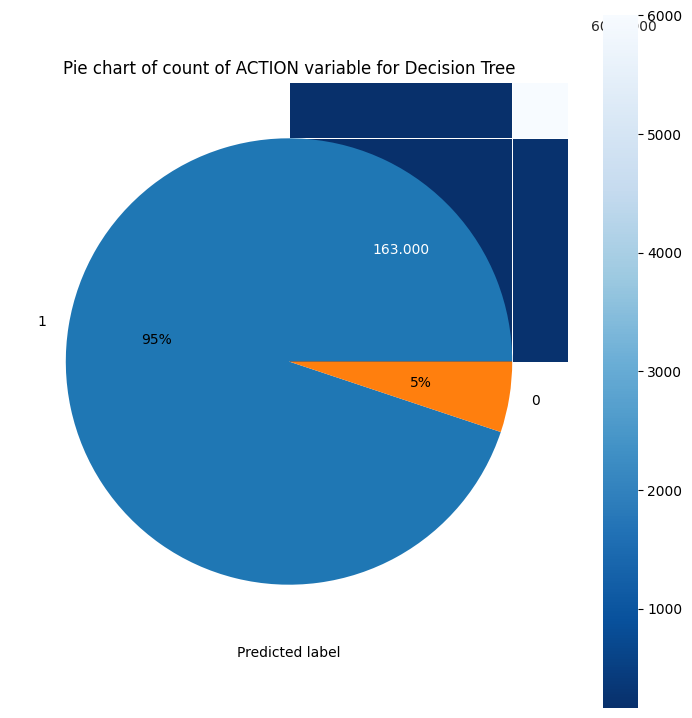

In [49]:
# Pie chart for counts of ACTION target variable for test dataframe
count_Class_dt.plot(kind='pie', autopct='%1.0f%%')
plt.title('Pie chart of count of ACTION variable for Decision Tree')
plt.ylabel('')
plt.show()


**d. K-Nearest Neighbors (K-NN) Model**

In [ ]:
# Building K-NN model
model_knn = KNeighborsClassifier()

In [ ]:
# Cross validating the K-NN model
statistics_cv_knn = cross_validate(model_knn, X_train, y_train, groups=None, scoring='roc_auc', cv=5, n_jobs=2, return_train_score=True)
statistics_cv_knn = pd.DataFrame(statistics_cv_knn)
statistics_cv_knn.describe()

In [ ]:
# Training the K-NN model
model_knn_history = model_knn.fit(X_train, y_train)

In [ ]:
# Confusion matrix for Validation dataset
y_val_predictions_knn = model_knn_history.predict(X_val)
cm_knn = metrics.confusion_matrix(y_val, y_val_predictions_knn)
print(cm_knn)

In [ ]:
# Heat map for the confusion matrix
plt.figure(figsize=(9,9))
sns.heatmap(cm_knn, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("Accuracy- K-Nearest Neighbors", size=15)

In [ ]:
# Misclassification rate
print("Misclassification rate of K-NN Model: ", (((cm_knn[0][1] + cm_knn[1][0]) / cm_knn.sum()) * 100), "%")

In [ ]:
# Checking accuracy on validation dataset using model
print(classification_report(y_val, y_val_predictions_knn))

In [ ]:
# Model accuracy on training dataset
Accuracy_knn_train = model_knn_history.score(X_train, y_train)
print("Accuracy of K-NN Model- Training dataset: %.3f%%" % (Accuracy_knn_train * 100.0))

In [ ]:
# Model accuracy on validation dataset
Accuracy_knn_val = model_knn_history.score(X_val, y_val)
print("Accuracy of K-NN Model- Validation Dataset: %.3f%%" % (Accuracy_knn_val * 100.0))

In [ ]:
# Predicting on test dataset
y_test_knn = model_knn_history.predict(X_test)

In [52]:
# Saving predictions in dataframe
y_test_predictions_knn = pd.DataFrame()
y_test_predictions_knn["id"] = test_dataframe["id"]
y_test_predictions_knn["ACTION"] = y_test_knn
print(y_test_predictions_knn)

# Saving results to csv file
y_test_predictions_knn.to_csv("submission_knn.csv", index=False)

          id  ACTION
28824  28825       1
57245  57246       1
51608  51609       1
15919  15920       1
50230  50231       1
...      ...     ...
22718  22719       1
7784    7785       1
39655  39656       1
35413  35414       1
17508  17509       1

[58921 rows x 2 columns]


In [ ]:
# Finding ACTION target variable for test dataframe
count_Class_knn = y_test_predictions_knn['ACTION'].value_counts()
print("Count of ACTION variable for K-NN: \n", count_Class_knn)

[[ 130  253]
 [ 108 6063]]
Misclassification rate of K-NN Model:  5.508086664632286 %
              precision    recall  f1-score   support

           0       0.55      0.34      0.42       383
           1       0.96      0.98      0.97      6171

    accuracy                           0.94      6554
   macro avg       0.75      0.66      0.69      6554
weighted avg       0.94      0.94      0.94      6554

Accuracy of K-NN Model- Training dataset: 96.025%
Accuracy of K-NN Model- Validation Dataset: 94.492%
          id  ACTION
28824  28825       1
57245  57246       1
51608  51609       1
15919  15920       1
50230  50231       1
...      ...     ...
22718  22719       1
7784    7785       1
39655  39656       1
35413  35414       1
17508  17509       1

[58921 rows x 2 columns]
Count of ACTION variable for K-NN: 
 ACTION
1    56865
0     2056
Name: count, dtype: int64


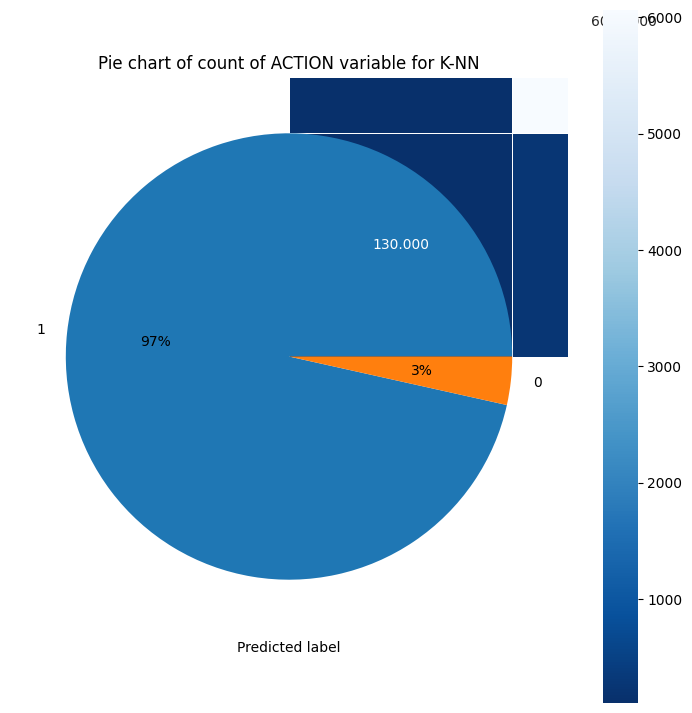

In [50]:
# Pie chart for counts of ACTION target variable for test dataframe
count_Class_knn.plot(kind='pie', autopct='%1.0f%%')
plt.title('Pie chart of count of ACTION variable for K-NN')
plt.ylabel('')
plt.show()


## **4. Model Comparison and Conclusion**


[Text(0.5, 1.0, 'Model Comparison'),
 Text(0.5, 0, 'Models'),
 Text(0, 0.5, 'Accuracy')]

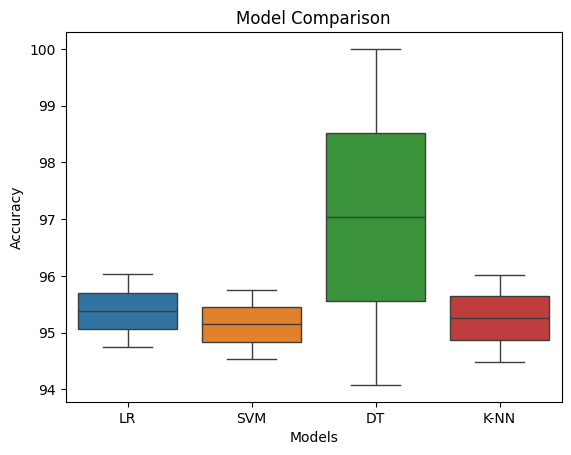

In [51]:
# Plotting accuracies of all models in a box plot

Accuracy_of_allModels = {'LR': [96.03, 94.74], 'SVM': [95.76, 94.54], 'DT': [100, 94.08], 'K-NN': [96.025, 94.492]}
df = pd.DataFrame(data=Accuracy_of_allModels)
sns.boxplot(data=df).set(title = 'Model Comparison', xlabel = 'Models', ylabel = 'Accuracy' )

* From the analysis of all models, it's evident that each model achieves a high level of accuracy, ranging from 94.08% to 100%. However, when considering the generalization error gap, the Support Vector Machine (SVM) model demonstrates the smallest gap, indicating better generalization capability. On the other hand, the Decision Tree model exhibits a larger generalization error gap, suggesting potential overfitting. This underscores the importance of regularization techniques in improving generalization performance while maintaining high accuracy.

* Considering both accuracy and generalization, the Support Vector Machine emerges as the best model. Its validation accuracy of 94.54% is slightly lower than the best-performing Linear Regression model (94.74%), but its smaller generalization gap makes it a more reliable choice for making predictions.
